## <center>Title: Investigation of the Original Wisconsin Breast Cancer Dataset</center>

https://www.kaggle.com/datasets/mariolisboa/breast-cancer-wisconsin-original-data-set

The original Wisconsin breast cancer dataset was created by dr. William H. Wolberg of the University of Wisconsin Hospitals. It is composed of 10 attributes and 699 instances. All instances are of one of two classes; "2" for benign (non-cancerous) or "4" for malignant (the presence of cancer). 16 Data points with missing values were removed leaving 683 instances in this version of the dataset. It is used for classification problems. A scale of number from 1 to 10 was used to indicate the degree of abnormality, with 10 the most abnormal:

In [1]:
import pandas as pd
datafr = pd.read_csv("tumor.csv")
datafr.head(30)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [2]:
datafr.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [3]:
datafr.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
datafr["Clump Thickness"].count()

683

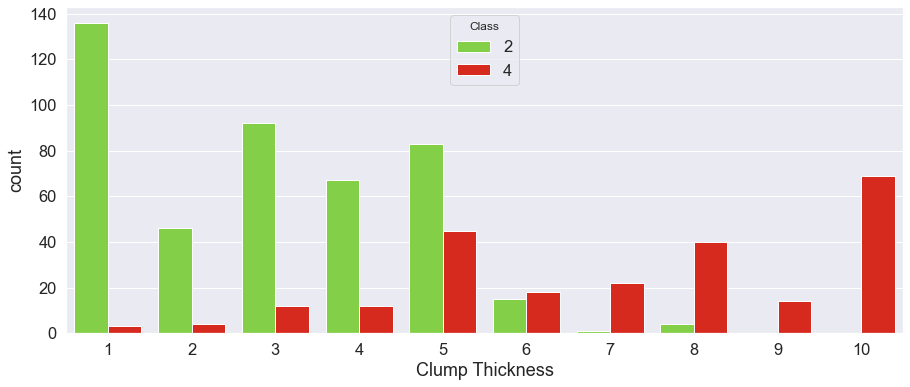

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Clump Thickness', hue = 'Class', data = datafr, palette = ['#81e532',"#f60f00"]);

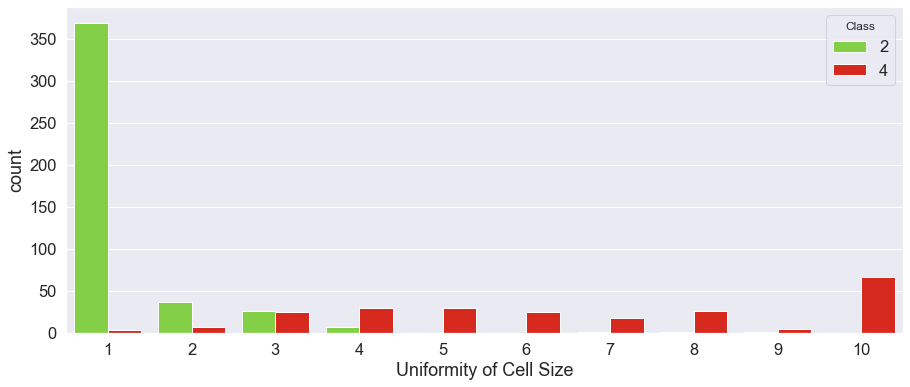

In [21]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Size', hue = 'Class', data = datafr, palette = ['#81e532',"#f60f00"]);

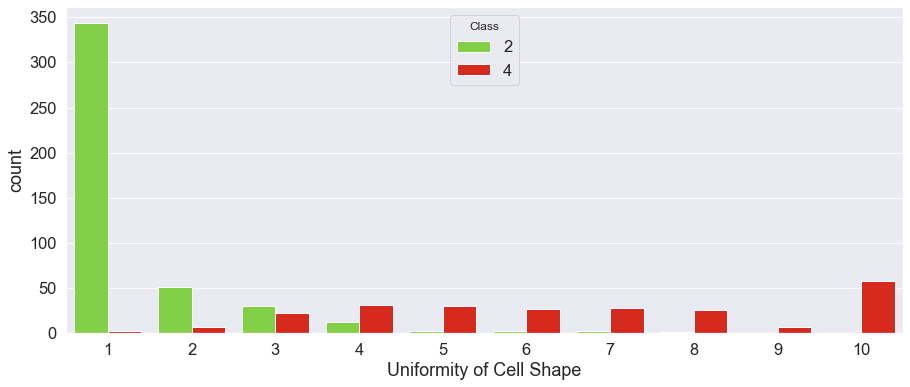

In [24]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Shape', hue = 'Class', data = datafr, palette = ['#81e532',"#f60f00"]);

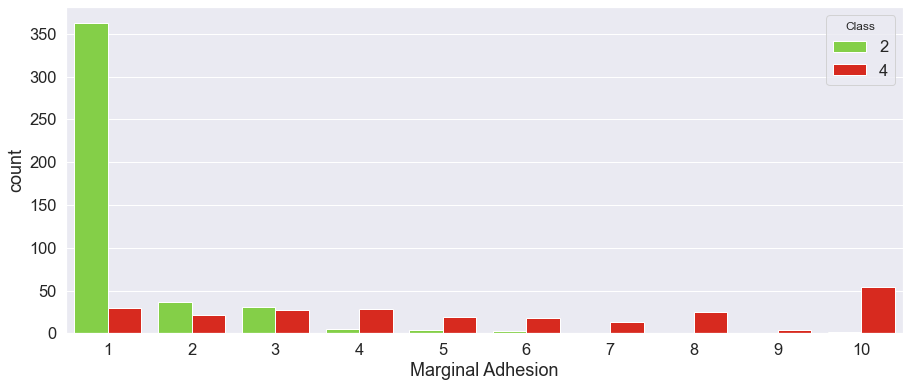

In [25]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Marginal Adhesion', hue = 'Class', data = datafr, palette = ['#81e532',"#f60f00"]);

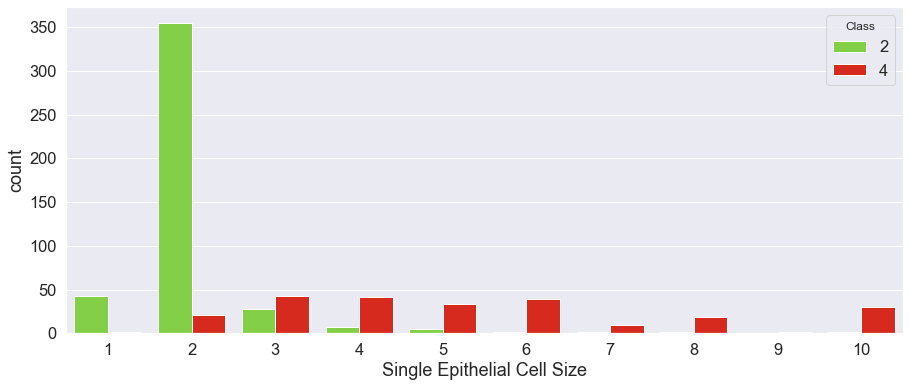

In [26]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Single Epithelial Cell Size', hue = 'Class', data = datafr, palette = ['#81e532',"#f60f00"]);

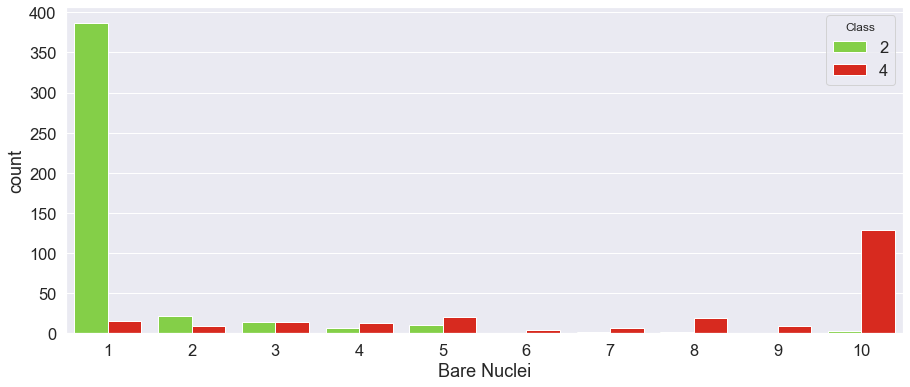

In [27]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bare Nuclei', hue = 'Class', data = datafr, palette = ['#81e532',"#f60f00"]);

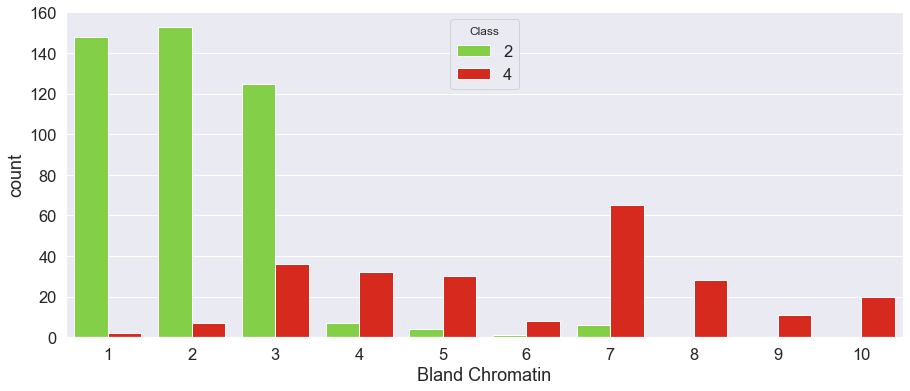

In [28]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bland Chromatin', hue = 'Class', data = datafr, palette = ['#81e532',"#f60f00"]);

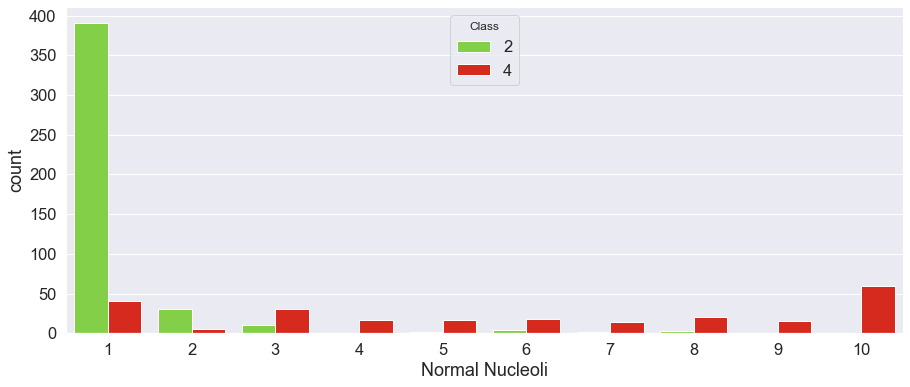

In [29]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Normal Nucleoli', hue = 'Class', data = datafr, palette = ['#81e532',"#f60f00"]);

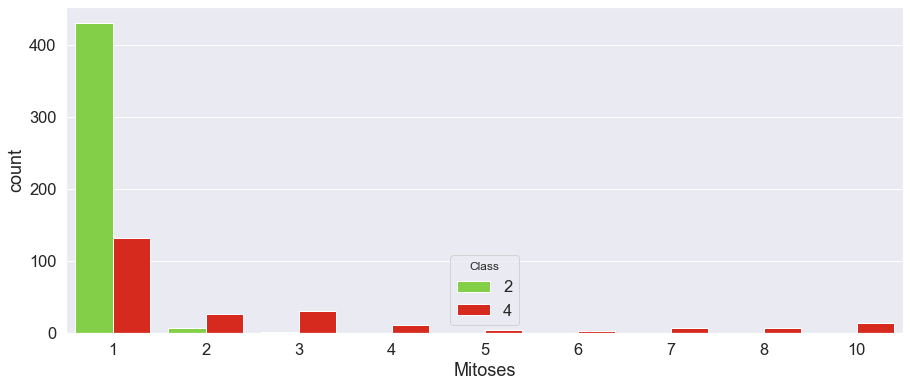

In [33]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Mitoses', hue = 'Class', data = datafr, palette = ['#81e532',"#f60f00"]);

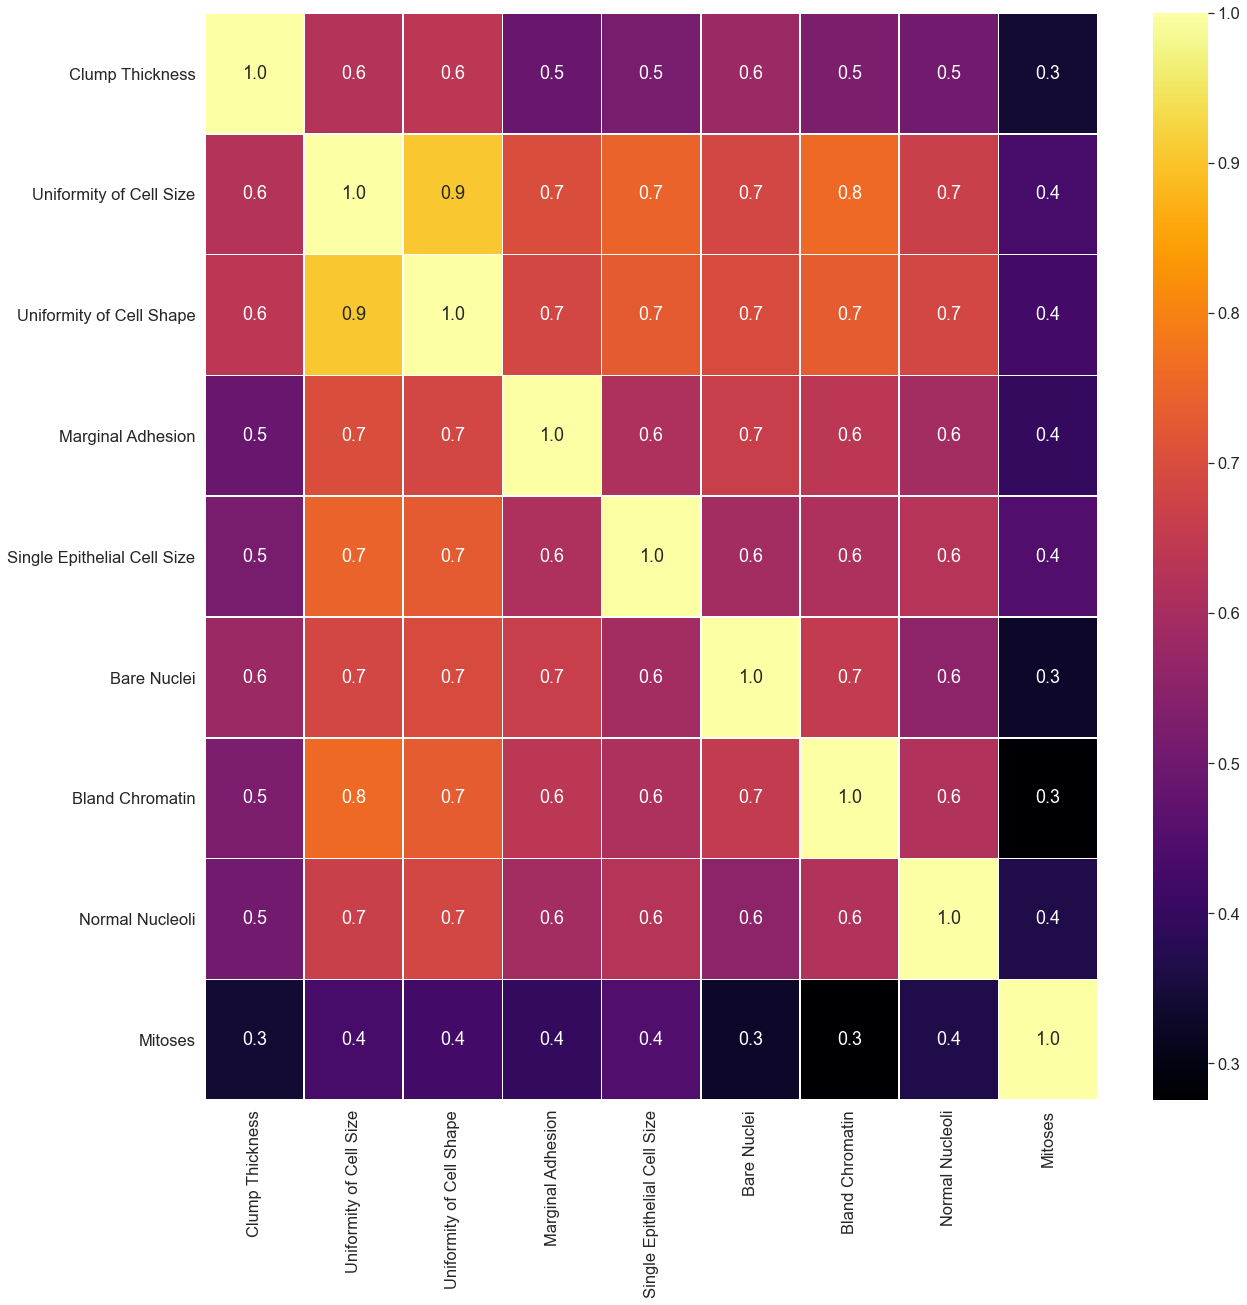

In [63]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(xtrain.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="inferno");

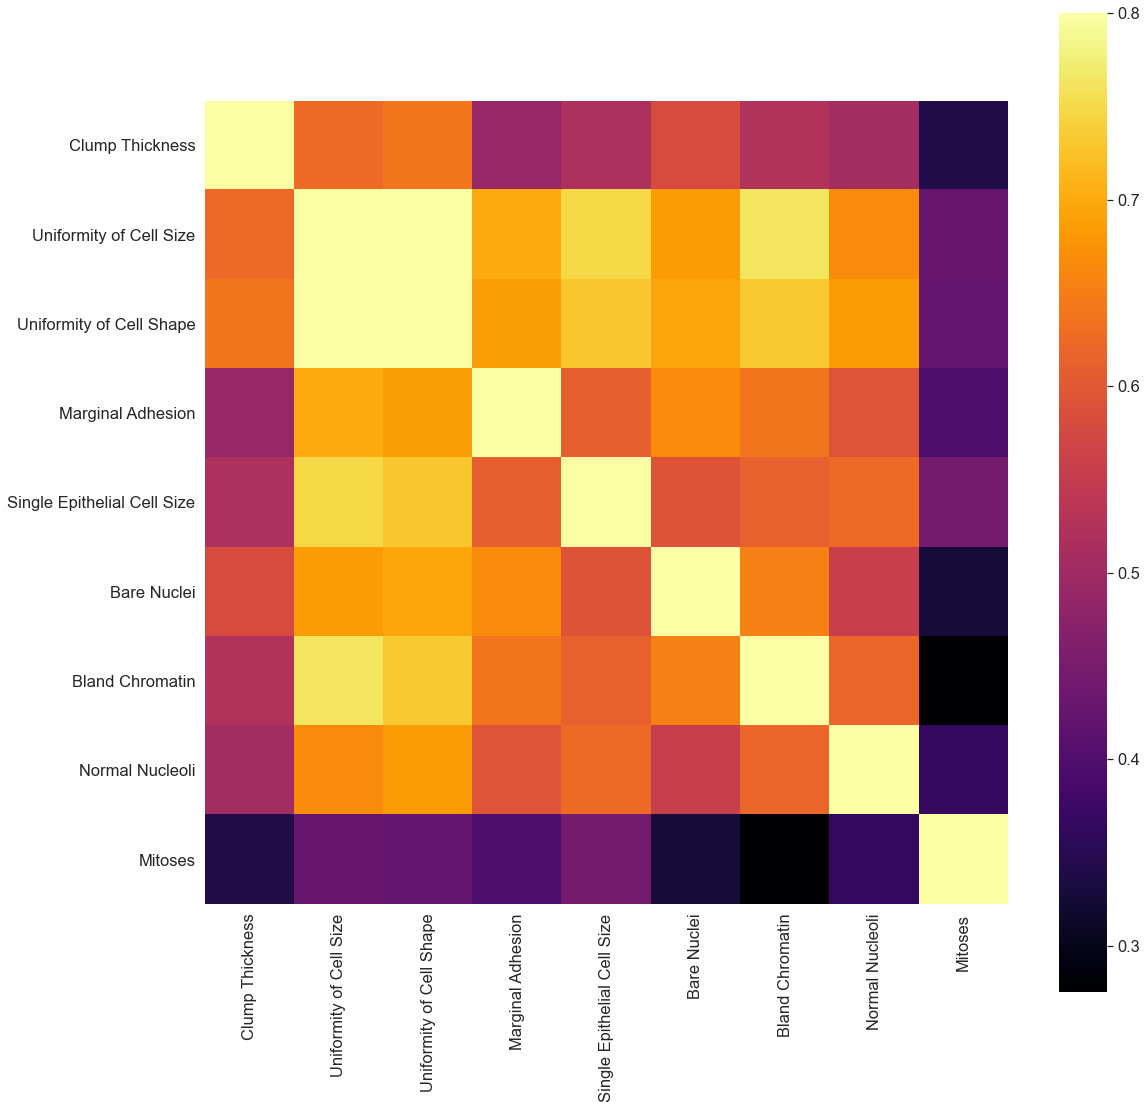

In [62]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(xtrain.corr(), vmax=.8, square=True, cmap="inferno");

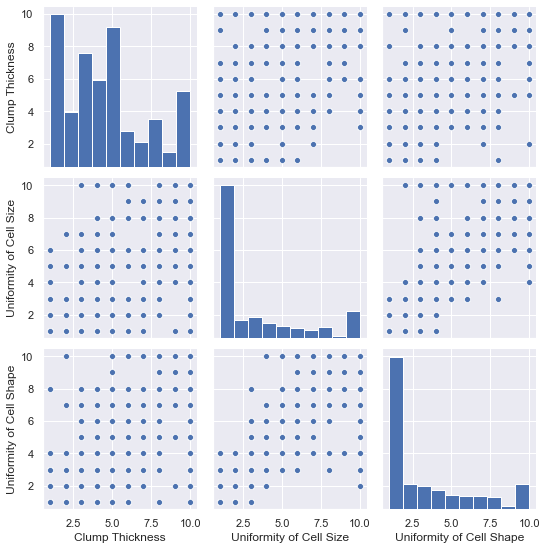

In [70]:
sns.set()
cols = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']
sns.pairplot(datafr[cols], height=2.5)
plt.show();

<b>Bayesian Network Classifier:

This classifier assumes independence between variables. "A Bayesian network classifier is simply a Bayesian network applied to classification, that is, the prediction of the probability $P(c | x)$ of some discrete (class) variable C given some features $X$."
"A Bayesian network classifier is a Bayesian network used for predicting a discrete class variable C. It assigns x, an observation of n predictor variables (features) $X = (X1, . . . , Xn)$, to the most probable class:  $c∗ = arg maxP(c | x) = arg maxP(x, c)$.
"The classifier factorizes $P(x, c)$ according to a Bayesian network $B = hG, θi$. $G$ is a directed acyclic graph with a node for each variable in $(X, C)$, encoding conditional independencies: a variable $X$ is independent of its nondescendants in $G$ given the values $pa(x)$ of its parents. G thus factorizes the joint into local (conditional) distributions over subsets of variables: $P(x, c) = P(c | pa(c))Yn i = 1 P(xi | pa(xi))$." ( Mihaljević et al., 2022)


Using the Bayesian Networks classifier, accuracy in one study was 97.14%, when discretization of data points was applied the accuracy was 97.28% and when both discretization and equal frequency mode was applied the accuracy was 97.42%. Equal frequency is when data points are divided equally into separate bins. Discretization sorts continuous variables into a discrete format to improve the performance of a classifier. (Borges, 2015)

The J48 classifier performed best when the original data was used, with an accuracy result of 94.56%. After discretization was applied, the accuracy was 94.42% and with discretization and equal frequency mode applied, the accuracy was 93.56%. When missing values were replaced the mean got from training data, the accuracy was 95.14% and when the missing values were removed, accuracy rose to 96.05%. Discretizing the replaced and removed missing values produced accuracies of 94.42% and 93.41%. Testing the classifier after removing attributes reduced the accuracy. The function "Select Attributes" was used to calculate the worth of an attribute by measuring the information gain with respect to the class. These results were used to determine the order in which to remove attributes from the data which had the missing values removed. "8 plus the class" had accuracy 95.75%, "7 plus the class": 95.9%, "3 plus the class": 95.61%. An interesting result was that the false-negative rate of 1.61% was the same for when all attributes were included and when "3 plus the class" was used. 

### Random Forest Classifier:

Random forest (RF) is an ensemble type of classifier. Random forests combine the concepts of classification and regression trees, and bagging with some randomization. In ensemble machine learning, multiple models are used on a dataset. It can be used for classification and regression. Ensembles give better results when theres a diversity among the models. RF utilizes Bootstrap Aggregating, also known as Bagging. It involves creating the classifiers using randomly selected data samples. "Using bagging, each decision tree in the ensemble is constructed using a sample with replacement from the training data." "Each tree in the ensemble acts as a base classifier to determine the class label of an unlabeled instance. This is done via majority voting where each classifier casts one vote for its predicted class label, then the class label with the most votes is used to classify the instance." (authors et al., 2014)

Classification and regression trees are used to partition a variable space based on rules embedded in a decision tree. A decision tree makes prediction based on how a set of questions are answered. A root node is divided into sub nodes by the process of splitting. Sub nodes may themselves be divided until leaf nodes are reached which may contain outcomes or answers. "In the original paper on RF (Breiman, 2001), it was shown that the RF error rate depends on correlation and strength. Increasing the correlation between any two trees in the RF increases the forest error rate. A tree with a low error rate is a strong classifier. Increasing the strength of the individual trees decreases the RF error rate. Such findings seem to be consistent with a study made by Bernard et al. (2010) which showed that the error rate statistically decreases by jointly maximizing the strength and minimizing the correlation." (authors et al., 2014)   

---

---

### Implementing a logistric regression classifier:

In [50]:
y = datafr["Class"].values
x = datafr.drop(["Class"], axis=1)
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)

In [52]:
from sklearn.linear_model import LogisticRegression
lgReg = LogisticRegression()
lgReg.fit(x_train, y_train)
score.append(lgReg.score(x_test, y_test) * 100)
algorithms.append("Logistic Regression")
print(f"test accuracy {(lgReg.score(x_test, y_test))}")

test accuracy 0.9609756097560975


In [53]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = lgReg.predict(x_test)
y_true = y_test
con = confusion_matrix(y_true, y_pred)

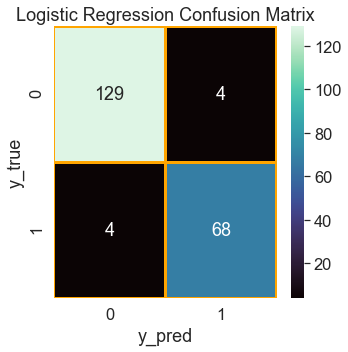

In [69]:
#Confusion Matrix on Heatmap
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(con, cmap="mako", annot=True, linewidths=2, cbar=True, linecolor="orange", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

---

---

### Implementing Decision Tree classifier:

In [35]:
datafr.drop('Sample code number',axis=1,inplace=True)

In [36]:
data_df = list(datafr.columns[1:31]) 
data_df_main = datafr.loc[:,data_df]

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_df_main, datafr["Class"], random_state=1, test_size=0.33)

In [40]:
array = []
score = []
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier()
decTree.fit(x_train,y_train)
print("Decision Tree accuracy:",decTree.score(x_test,y_test) * 100)
score.append(decTree.score(x_test,y_test) * 100)
array.append("Decision Tree")

Decision Tree accuracy: 100.0


In [42]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix
y_pred = decTree.predict(x_test)
y_true = y_test
con = confusion_matrix(y_true, y_pred)

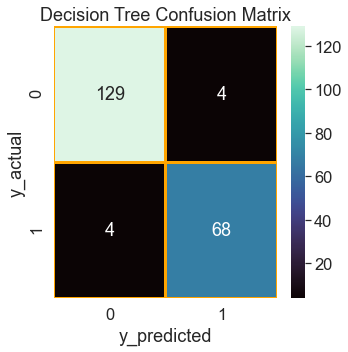

In [68]:
# Heatmap:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(con, annot=True, cmap="mako", linewidths=2, linecolor="orange", fmt=".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

### Implementing Support Vector Machines classifier:

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [11]:
datafr.drop('Sample code number',axis=1,inplace=True)

In [12]:
datafr.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
datafr.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
data_df = list(datafr.columns[1:31]) 
data_df_main = datafr.loc[:,data_df]

In [14]:
data_df

['Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

In [15]:
data_df_main.describe()

,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [16]:
datafr['Class'].unique()

array([2, 4], dtype=int64)

In [17]:
datafr['Mitoses'].unique()

array([ 1,  5,  4,  2,  3,  7, 10,  8,  6], dtype=int64)

In [18]:
X = data_df_main
y = datafr['Class']

In [21]:
svm_model = SVC()

parameters = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              
 ]

In [22]:
grid_svm = GridSearchCV(svm_model, parameters, cv=20, scoring="accuracy")
grid_svm.fit(X,y)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='accuracy')

In [23]:
print(grid_svm.best_score_)

1.0


In [24]:
data_df = list(datafr.columns[0:9]) 
data_df_main = datafr.loc[:,data_df]

In [25]:
data_df

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

In [26]:
data_df_main

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data_df_main, datafr['Class'], test_size=0.33, random_state=42)

In [28]:
svc = SVC()

In [29]:
svc.fit(xtrain, ytrain)

SVC()

Predictions:

In [30]:
preds = svc.predict(xtest)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

The confusion matrix contains true positives, false postives, false negatives and true negatives:

In [32]:
confusion_matrix(ytest, preds)

array([[139,   3],
       [  8,  76]], dtype=int64)

An accuracy of $95\%$ achieved using support vector machines. So $95\%$ of the predictions were correct. The f1-score is related to how many false positives and false negatives were detected:

In [33]:
classification_report(ytest, preds, output_dict=True)

{'2': {'precision': 0.9455782312925171,
  'recall': 0.9788732394366197,
  'f1-score': 0.9619377162629758,
  'support': 142},
 '4': {'precision': 0.9620253164556962,
  'recall': 0.9047619047619048,
  'f1-score': 0.9325153374233128,
  'support': 84},
 'accuracy': 0.9513274336283186,
 'macro avg': {'precision': 0.9538017738741067,
  'recall': 0.9418175720992623,
  'f1-score': 0.9472265268431443,
  'support': 226},
 'weighted avg': {'precision': 0.9516913071938756,
  'recall': 0.9513274336283186,
  'f1-score': 0.9510019648358443,
  'support': 226}}

In one study, an accuracy of $97.1\%$ using the mean for missing values and $97.8\%$ using the median for missing values was obtained using the SVM model on the original dataset. ( Egwom et al., 2022)

The recall and precision results from the study:

In [ ]:
                     Mean           Median
   Accuracy          97.1%          97.8%
   Recall            97.0%          98.0%
   Precision         97.0%          97.0%

---
---
---

### Implementing a random forest classifier: 

In [5]:
# https://www.kaggle.com/code/adrielnaranjo/breast-cancer-classification-with-random-forest
import time
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

In [6]:
x = pd.value_counts(datafr.Class)

In [7]:
# 444 benign cases and 239 malignant cases:
x

2    444
4    239
Name: Class, dtype: int64

In [8]:
datafr['Class']

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [ ]:
datafr2 = datafr[np.isfinite(datafr).all(1)]
datafr2

In [72]:
#feature_space = data_df_main
feature_space = datafr.iloc[:, datafr.columns != 'Class']
feature_class = datafr.iloc[:, datafr.columns == 'Class']

# train_test_split
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42)
# Cleaning test sets to avoid future warning messages
class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel()

In [12]:
feature_space

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [13]:
feature_class

,Class
0,2
1,2
2,2
3,2
4,2
...,...
678,2
679,2
680,4
681,4


In [73]:
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=10)

In [74]:
# A function to remove the error: "ValueError: Input contains NaN, infinity or a value too large for dtype('float64')."
# https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(data_df_main)
clean_dataset(datafr)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
679,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
680,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
681,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


In [75]:
np.random.seed(42)
start = time.time()

# GridSearchCV
param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

# Setting up the GridSearch
cv_rf = GridSearchCV(rf_classifier, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)

# Fitting the GridSearch
cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)


end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': None}
Time taken in grid search:  22.88


In [76]:
# Setting the best parameters given by grid search:
rf_classifier.set_params(criterion = 'gini',
                  max_features = 'log2', 
                  max_depth = 3, 
                  )

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=10,
                       random_state=42)

In [77]:
# warm_start = True reuse the solution of the previous call to fit 
# and add more estimators to the ensemble, otherwise, just fit a whole new forest.

rf_classifier.set_params(warm_start=True, 
                  oob_score=True)

# found this from sci-kit learn https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
min_estimators = 15
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf_classifier.set_params(n_estimators=i)
    rf_classifier.fit(training_set, class_set)

    oob_error = 1 - rf_classifier.oob_score_
    error_rate[i] = oob_error

C:\Users\HP6550b\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\HP6550b\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


In [78]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

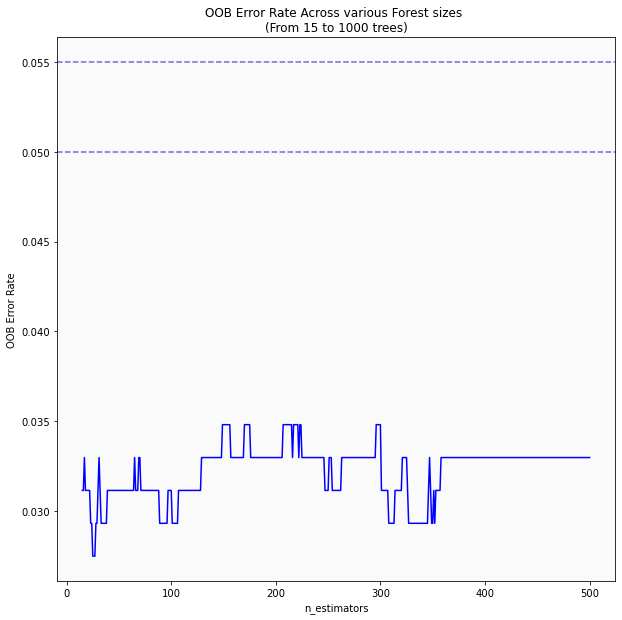

In [20]:
# Plotting the OOB_scores line graph: oob_error vs. n_estimators
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'blue')
plt.axhline(0.055, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [71]:
model=RandomForestClassifier(n_estimators=350)
model.fit(xtrain,ytrain)
pred = model.predict(xtrain)
accuracy = model.score(xtest,ytest)
print(accuracy*100,'%')

95.57522123893806 %



 Feature Names: 

 [0 1 2 3 4 5 6 7] 


Feature Correlation:



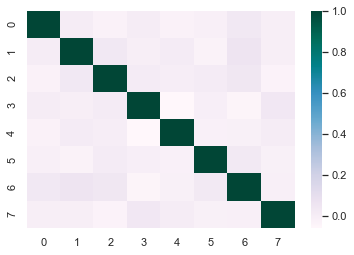

In [82]:
# https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
from sklearn import metrics 
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
transf = pca.fit_transform(xtrain,ytrain)
xpca = pd.DataFrame(transf)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xpca, ytrain, test_size=0.2)
print('\n Feature Names: \n\n', xpca.columns.values, "\n")
print("\nFeature Correlation:\n")
g = sns.heatmap(xtrain2.corr(),cmap="PuBuGn",annot=False)

In [84]:
clf1 = RandomForestClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(xtrain, ytrain)
clf2 = RandomForestClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(xtrain2,ytrain2)
print('Accuracy of Random Forest classifier on original training set: {:.2f}'.format(clf1.score(xtrain, ytrain)))
print('Accuracy of Random Forest classifier on original test set: {:.2f}'.format(clf1.score(xtest, ytest)))
print('Accuracy of Random Forest classifier on PCA-transformed training set: {:.2f}'.format(clf2.score(xtrain2, ytrain2)))
print('Accuracy of Random Forest classifier on PCA-transformed test set: {:.2f}'.format(clf2.score(xtest2,ytest2)))

Accuracy of Random Forest classifier on original training set: 0.97
Accuracy of Random Forest classifier on original test set: 0.96
Accuracy of Random Forest classifier on PCA-transformed training set: 0.97
Accuracy of Random Forest classifier on PCA-transformed test set: 0.98


### How could the dataset be extended? 

Python packages and methods could be used to extract mathematical statistics from the dataset, and from those statistics generate new data points.

In [6]:
datafr["Clump Thickness"].std()

2.8207613188371314

In [7]:
datafr["Clump Thickness"].mean()

4.44216691068814

In [15]:
datafr["Clump Thickness"].count()

683

In [5]:
datafr["Clump Thickness"].value_counts()

1     139
5     128
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: Clump Thickness, dtype: int64

In [6]:
datafr["Uniformity of Cell Size"].value_counts()

1     373
10     67
3      52
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64

In [7]:
datafr["Uniformity of Cell Shape"].value_counts()

1     346
10     58
2      58
3      53
4      43
5      32
7      30
6      29
8      27
9       7
Name: Uniformity of Cell Shape, dtype: int64

In [8]:
datafr["Marginal Adhesion"].value_counts()

1     393
3      58
2      58
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: Marginal Adhesion, dtype: int64

In [9]:
datafr["Single Epithelial Cell Size"].value_counts()

2     376
3      71
4      48
1      44
6      40
5      39
10     31
8      21
7      11
9       2
Name: Single Epithelial Cell Size, dtype: int64

In [10]:
datafr["Bare Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [11]:
datafr["Bland Chromatin"].value_counts()

3     161
2     160
1     150
7      71
4      39
5      34
8      28
10     20
9      11
6       9
Name: Bland Chromatin, dtype: int64

In [12]:
datafr["Normal Nucleoli"].value_counts()

1     432
10     60
3      42
2      36
8      23
6      22
5      19
4      18
7      16
9      15
Name: Normal Nucleoli, dtype: int64

In [13]:
datafr["Mitoses"].value_counts()

1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [14]:
datafr["Class"].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [8]:
import numpy as np
Clump_Thickness = np.random.choice((1,2,3,4,5,6,7,8,9,10), 100, p=[139/683, 50/683, 104/683, 79/683, 128/683, 33/683, 23/683, 44/683, 14/683, 69/683])
Clump_Thickness

array([ 8,  1,  4,  4, 10,  2,  3,  3,  1,  9,  3,  1,  1,  2, 10,  3,  1,
        4, 10,  3,  5,  1,  3,  1,  3,  5,  4,  5,  1,  1,  3,  3, 10,  6,
        5,  5, 10,  2,  4,  3,  1,  1,  5,  4,  8,  3, 10,  3,  1,  3,  5,
        7,  4,  1,  1,  4,  2,  3,  2,  1,  2,  5,  1,  3, 10,  1,  4,  1,
        4, 10,  4,  5,  3,  2,  1,  3,  8, 10,  8,  2,  1, 10,  6,  5,  4,
        6,  5,  5,  9,  4,  4,  6,  8,  3,  2, 10, 10,  4,  5,  3])

In [9]:
Uniformity_of_Cell_Size = np.random.choice((1,2,3,4,5,6,7,8,9,10), 100, p=[373/683, 45/683, 52/683, 38/683, 30/683, 25/683, 19/683, 28/683, 6/683, 67/683])
Uniformity_of_Cell_Size

array([ 1,  1,  1,  5,  2,  1,  6,  1,  1,  3,  2, 10,  5,  1,  1,  3,  1,
        1,  1,  1,  1,  3,  7,  1,  3,  1, 10, 10,  1,  1, 10,  6,  1,  9,
        1,  3,  6,  1, 10,  1,  1, 10,  1,  4,  1,  1,  4,  6,  1,  6,  1,
        1,  1,  3,  1,  1,  2,  1,  1, 10,  2,  4,  5,  9,  2,  1,  1,  3,
        6,  3,  1, 10,  3,  1,  1,  1,  1,  5,  2, 10,  1,  8,  1,  5, 10,
        5,  1,  1,  1,  3,  3,  5,  1,  1,  1,  1,  6, 10,  1,  1])

In [11]:
Uniformity_of_Cell_Shape = np.random.choice((1,2,3,4,5,6,7,8,9,10), 100, p=[346/683, 58/683, 53/683, 43/683, 32/683, 29/683, 30/683, 27/683, 7/683, 58/683])
Uniformity_of_Cell_Shape

array([ 7,  1,  8,  2,  5,  1, 10,  1,  6, 10,  5,  1,  1,  1,  3,  3,  1,
        4, 10,  2,  1,  1,  7,  7,  1,  3,  3,  3,  3,  4,  6,  1, 10,  1,
        1, 10,  1,  1, 10, 10,  3,  5,  3,  2,  1,  1,  1,  1,  1,  3,  4,
        1,  6,  5,  7,  1,  6,  1,  5,  1,  2,  3,  5,  4,  1,  1,  1,  5,
       10,  4,  3,  4,  4,  5,  1,  1,  1, 10,  2,  1,  1,  1,  1,  1,  2,
        8,  1,  1,  8,  1, 10,  5,  1,  7,  1, 10,  1,  1,  8,  1])

In [12]:
Marginal_Adhesion = np.random.choice((1,2,3,4,5,6,7,8,9,10), 100, p=[393/683, 58/683, 58/683, 33/683, 23/683, 21/683, 13/683, 25/683, 4/683, 55/683])
Marginal_Adhesion

array([ 1,  1, 10,  1,  8,  2,  3,  3,  1, 10,  8,  1,  1, 10,  1,  1,  4,
        1,  1,  3,  1,  6,  1,  1,  4,  1,  1,  1,  3,  1,  1,  2,  1,  5,
        1,  1,  4,  1,  1,  1,  1,  6,  8,  1,  1,  7,  3,  1,  1,  3,  3,
        1,  6,  1,  3,  1,  5,  1, 10,  7,  1,  1,  1,  1,  1,  3,  1,  1,
        2,  1,  1,  1,  1, 10,  4,  1,  6,  1,  1,  1,  2, 10,  1,  1,  1,
       10,  4,  4,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  4,  5])

In [13]:
Single_Epithelial_Cell_Size = np.random.choice((1,2,3,4,5,6,7,8,9,10), 100, p=[44/683, 376/683, 71/683, 48/683, 39/683, 40/683, 11/683, 21/683, 2/683, 31/683])
Single_Epithelial_Cell_Size

array([ 7,  5,  3,  6, 10,  2,  6, 10,  8,  1,  2,  2, 10,  2,  2,  2,  2,
        6,  2,  2,  2,  2,  2,  1,  2,  4,  2,  2,  2,  1,  2,  5,  2, 10,
        2,  2,  5,  8,  5,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  2,
        2,  2,  2,  2,  1, 10,  6,  5,  3, 10,  1,  2,  6,  2,  2,  1,  2,
        2,  1,  6,  8,  2,  6,  2,  1,  2,  2,  4,  3,  2,  6,  2,  2,  2,
        2,  5,  2,  5,  1,  1,  2,  2,  4,  2,  2,  1,  4,  3,  6])

In [14]:
Bare_Nuclei = np.random.choice((1,2,3,4,5,6,7,8,9,10), 100, p=[402/683, 30/683, 28/683, 19/683, 30/683, 4/683, 8/683, 21/683, 9/683, 132/683])
Bare_Nuclei

array([10,  1,  1,  1,  5,  1, 10,  1,  5, 10,  4,  1,  1,  1,  1,  1, 10,
        8,  1,  1,  1,  1,  1, 10,  3,  1,  4,  4,  1, 10, 10,  4,  1,  8,
        1,  1,  9,  1,  1,  1,  1, 10,  1,  8, 10,  8,  1,  1, 10,  1, 10,
        1,  2,  8, 10,  1,  9,  1,  1,  6,  1,  2, 10,  1,  1,  1,  1,  5,
       10,  9, 10,  4,  1,  4, 10, 10,  1,  1, 10,  1,  3,  6,  1,  1, 10,
        4,  1,  1,  3,  1,  1,  3,  3,  1,  1,  1,  1,  1, 10,  1])

In [15]:
Bland_Chromatin = np.random.choice((1,2,3,4,5,6,7,8,9,10), 100, p=[150/683, 160/683, 161/683, 39/683, 34/683, 9/683, 71/683, 28/683, 11/683, 20/683])
Bland_Chromatin

array([ 3,  3,  3,  2,  8,  7,  2,  5,  1,  1,  2,  7,  1,  4,  4,  2,  3,
        3,  3,  1,  8,  7,  1,  2,  7,  1,  1,  2, 10,  7,  1,  2,  4,  4,
        1,  7,  3,  2,  3,  3,  1,  5,  9,  8,  1,  5,  2,  4,  7, 10,  7,
        7,  3,  7,  2,  1,  8,  3,  1,  3,  2,  3,  2,  4,  6,  4,  2,  7,
        2,  1,  2,  1,  1,  2,  3,  1,  2, 10,  2,  1,  3,  1,  2,  2,  1,
        3,  2,  2,  2,  1,  2,  3,  1,  3,  3,  3,  3,  9,  9, 10])

In [16]:
Normal_Nucleoli = np.random.choice((1,2,3,4,5,6,7,8,9,10), 100, p=[432/683, 36/683, 42/683, 18/683, 19/683, 22/683, 16/683, 23/683, 15/683, 60/683])
Normal_Nucleoli

array([ 1,  8,  6,  1,  1,  5,  1,  1,  3,  3,  1,  7,  1,  1,  1,  1,  2,
        8,  1,  1,  3,  1,  1,  1,  7,  1,  7,  8,  9,  3,  8,  9,  6,  1,
        1,  3,  1,  9, 10,  1,  1,  1,  1,  3,  2, 10,  1,  8,  4,  8,  1,
        1,  1,  1,  1,  1, 10,  8,  1,  1,  4,  1,  1,  1,  1,  1,  1,  8,
        1,  1,  1, 10,  1, 10,  1,  1,  5,  1,  7,  5,  1,  1,  4,  1,  1,
        1,  2,  1,  1,  1, 10,  6,  1,  4,  3,  1,  1,  3, 10,  8])

In [17]:
Mitoses = np.random.choice((1,2,3,4,5,6,7,8,10), 100, p=[563/683, 35/683, 33/683, 12/683, 6/683, 3/683, 9/683, 8/683, 14/683])
Mitoses

array([ 1,  1,  1,  1,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1,  8,  1,  3,
        1,  1,  1,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 10,  1,  1,  2,  1,  3,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,
        5,  3,  7,  2,  3,  1,  1,  1, 10,  2,  2,  1,  1,  1,  1,  1,  1,
        3,  1,  3,  1,  1,  1,  1,  2,  1,  2,  1,  1,  2,  1,  1,  1,  1,
        4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  1])

In [18]:
Class = np.random.choice((2,4), 100, p=[444/683, 239/683])
Class

array([2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4])

After randomly generating arrays based on the propabilites of values occurring, and the ranges of those values; these can then be added together into a new dataframe, or added to the dataframe created from the Wisconsin Original Breast Cancer dataset. 

In [19]:
#data = [Clump_Thickness], [Uniformity_of_Cell_Size], [Uniformity_of_Cell_Shape], [Marginal_Adhesion], [Single_Epithelial_Cell_Size], [Bare_Nuclei], [Bland_Chromatin], [Normal_Nucleoli], [Mitoses], [Class]
random_datafr = pd.DataFrame(list(zip(Clump_Thickness, Uniformity_of_Cell_Size, Uniformity_of_Cell_Shape, Marginal_Adhesion, Single_Epithelial_Cell_Size, Bare_Nuclei, Bland_Chromatin, Normal_Nucleoli, Mitoses, Class)), columns=["Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"])

In [20]:
random_datafr

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,8,1,7,1,7,10,3,1,1,2
1,1,1,1,1,5,1,3,8,1,2
2,4,1,8,10,3,1,3,6,1,2
3,4,5,2,1,6,1,2,1,1,2
4,10,2,5,8,10,5,8,1,2,2
...,...,...,...,...,...,...,...,...,...,...
95,10,1,10,1,2,1,3,1,1,4
96,10,6,1,1,1,1,3,1,1,2
97,4,10,1,1,4,1,9,3,2,2
98,5,1,8,4,3,10,9,10,3,4


In [24]:
random_datafr.columns = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [25]:
random_datafr.head(15)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,8,1,7,1,7,10,3,1,1,2
1,1,1,1,1,5,1,3,8,1,2
2,4,1,8,10,3,1,3,6,1,2
3,4,5,2,1,6,1,2,1,1,2
4,10,2,5,8,10,5,8,1,2,2
5,2,1,1,2,2,1,7,5,1,2
6,3,6,10,3,6,10,2,1,1,2
7,3,1,1,3,10,1,5,1,1,2
8,1,1,6,1,8,5,1,3,1,4
9,9,3,10,10,1,10,1,3,3,4


In [77]:
datafr.drop('Sample code number',axis=1,inplace=True)
datafr.head(20)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


The extended dataframe with 100 extra rows of data:

In [26]:
dataframes = [datafr, random_datafr]
# pandas concat() method can join two dataframes based on similar column names:
newDatafr = pd.concat(dataframes)
newDatafr

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
95,10,1,10,1,2,1,3,1,1,4
96,10,6,1,1,1,1,3,1,1,2
97,4,10,1,1,4,1,9,3,2,2
98,5,1,8,4,3,10,9,10,3,4


In [30]:
newDatafr.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,4.422733,3.167305,3.266922,2.817369,3.242656,3.595147,3.462324,2.927203,1.618135,2.694764
std,2.828218,3.067252,3.001111,2.846653,2.249722,3.654633,2.472519,3.070537,1.738250,0.952885
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [31]:
newDatafr["Class"].value_counts()

2    511
4    272
Name: Class, dtype: int64

### References:

[1]  Mihaljević, B., Bielza, C. and Larrañaga, P. (2022) Package overview - cran.r-project.org, bnclassifier. Available at: https://cran.r-project.org/web/packages/bnclassify/vignettes/overview.pdf (Accessed: December 10, 2022). 

[2] Borges, L. (2015) Analysis of the wisconsin breast cancer dataset and machine learning ..., ResearchGate. Available at: https://www.researchgate.net/profile/Lucas-Borges-13/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection/links/5864757e08ae329d6203aa82/Analysis-of-the-Wisconsin-Breast-Cancer-Dataset-and-Machine-Learning-for-Breast-Cancer-Detection.pdf?origin=publication_detail (Accessed: December 10, 2022). 

[3] authors, A., Fawagreh, K. and Gaber, M.M. (2014) Random forests: From early developments to recent advancements, Taylor &amp; Francis. Available at: https://www.tandfonline.com/doi/full/10.1080/21642583.2014.956265 (Accessed: December 19, 2022). 

[4] Egwom, O., Hassan, M., Tanimu, J., Hamada, M. and Ogar, O. (2022) An LDA–SVM Machine Learning Model for Breast
Cancer Classification, BioMedInformatics. Available at: https://www.mdpi.com/2673-7426/2/3/22 (Accessed: December 19, 2022).